# Switchiness- Methylation

In [1]:
import NotebookImport
from metaPCNA import *

importing IPython notebook from metaPCNA

importing IPython notebook from Imports

#### Generate probe-level coorelation with meta-PCNA 
* This takes a while, I'm doing it in chunks

In [2]:
store = pd.HDFStore('/data_ssd/miRNASeq_2015_04_02.h5')
cc = [c[1:] for c in store.keys() if c[1:] in codes.unique()]
mirna_df = pd.concat([store[c] for c in cc], 1)

In [3]:
standardize = lambda s: s.sub(s.mean(1), axis=0).div(s.std(1), axis=0)
df = mirna_df
df_s2 = df.groupby(codes, axis=0, level=0).apply(standardize)

In [4]:
#standardize = lambda s: s.sub(s.median(1), axis=0).div(s.mad(1), axis=0)
#df = mirna_df.xs('01',1,1)
#df_s = df.groupby(codes, axis=1).apply(standardize)
#mp2 = meta_pcna.groupby(codes).apply(standardize).dropna()

#pcna_corr = df_s.T.corrwith(mp2)

In [5]:
matched_mir = pd.read_hdf('/data_ssd/miRNASeq_2015_04_02.h5', 'matched_tn')
dx_mir = binomial_test_screen(matched_mir, fc=1.)
dx_mir = dx_mir[dx_mir.num_dx > 300]

In [6]:
def detrend(x,y):
    x, y = match_series(x, y)
    reg = linear_regression(x, y)
    #adj = (x * reg['slope']) + reg['intercept']
    adj = (y - reg['intercept']) / reg['slope']
    return adj

In [7]:
dp = -1*meta_pcna_all.unstack()[['01','11']].dropna().T.diff().ix['11']
dp = dp[dp > 0]
dp.name = 'proliferation change'
dx = matched_mir
dx = (dx.xs('01',1,1) - dx.xs('11',1,1)).replace(0, np.nan)
dx = dx.ix[ti(dx.count(1) > 300)]
pcna_corr = dx.T.corrwith(dp)

In [8]:
len(dp.index.intersection(dx.columns))

523

In [9]:
#pcna_corr = mirna_df.xs('01',1,1).T.corrwith(meta_pcna)

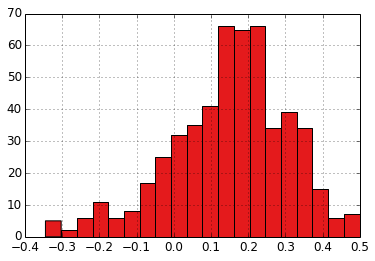

In [10]:
pcna_corr.hist(bins=20)

In [11]:
dx_mir.sort('p').head()

,num_ox,num_dx,frac,p
hsa-mir-21,594,642,0.93,9.15e-121
hsa-mir-139,66,642,0.10,1.42e-102
hsa-mir-133a-1,105,642,0.16,9.53e-71
hsa-mir-1307,536,642,0.83,4.84e-70
hsa-mir-204,106,642,0.17,4.84e-70


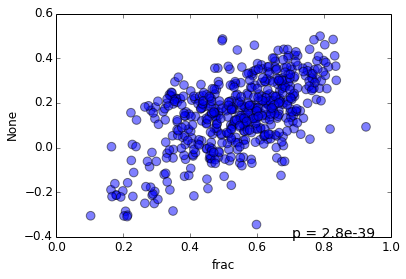

In [12]:
series_scatter(dx_mir.frac, pcna_corr)

In [33]:
dp = -1*meta_pcna_all.unstack()[['01','11']].dropna().T.diff().ix['11']
dp = dp[dp > 0]
dp.name = 'proliferation change'
dx = matched_mir
dx = (dx.xs('01',1,1) - dx.xs('11',1,1)).replace(0, np.nan)
dx = dx.ix[ti(dx.count(1) > 300)]
pcna_corr_mir = dx.T.corrwith(dp)

dx = matched_rna
dx = (dx.xs('01',1,1) - dx.xs('11',1,1)).replace(0, np.nan)
dx = dx.ix[ti(dx.count(1) > 300)]
pcna_corr_gene = dx.T.corrwith(dp)

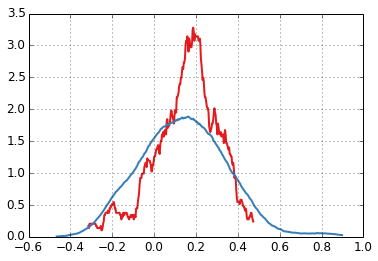

In [34]:
fig, ax = subplots()
draw_dist(pcna_corr_mir, ax=ax)
draw_dist(pcna_corr_gene, ax=ax)

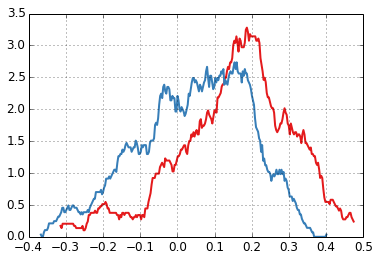

In [13]:
fig, ax = subplots()
draw_dist(pcna_corr, ax=ax)
draw_dist(dx_mir.frac-.5, ax=ax)

In [23]:
binom_test((pcna_corr > 0).sum(), pcna_corr.size)

2.5150581949202696e-58

In [29]:
dx = matched_rna.xs('01',1,1) - matched_rna.xs('11',1,1)
pearson_pandas(dx.sum(), dp)

rho    3.67e-01
p      1.64e-21
dtype: float64

In [28]:
dx = matched_mir.xs('01',1,1) - matched_mir.xs('11',1,1)
pearson_pandas(dx.sum(), dp)

rho    4.63e-01
p      4.21e-29
dtype: float64

In [17]:
(pcna_corr > 0).mean(), (dx_mir.frac > .5).mean()

(0.83846153846153848, 0.61923076923076925)

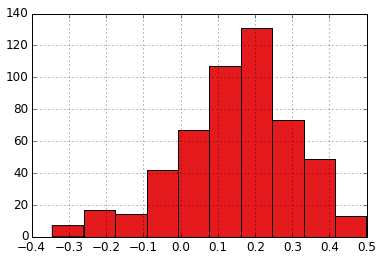

In [22]:
pcna_corr.hist()

In [20]:
pearson_pandas(dx_mir.frac, pcna_corr)

rho    5.86e-01
p      2.77e-49
dtype: float64

In [14]:
p2 = pd.concat([gene_stats.ix['metaPCNA'], pcna_corr])
f2 = pd.concat([gene_stats.ix['f_up'], dx_mir.frac])

In [15]:
m = pd.rolling_mean(f2.ix[p2.order().index].dropna(), 
                    window=500, center=True).dropna()
m2 = pd.rolling_mean(f2.ix[p2.order().index].dropna(), 
                    window=50, center=True).dropna()
m = m.combine_first(m2)
f2_win = (f2 - m).dropna()
f2_win.name = 'f_up\n(detrended)'

In [16]:
f2_win.ix[pcna_corr.index].dropna().order()

hsa-mir-206      -0.28
hsa-mir-204      -0.27
hsa-mir-381      -0.25
hsa-mir-411      -0.25
hsa-mir-379      -0.25
hsa-mir-299      -0.24
hsa-mir-654      -0.23
hsa-mir-873      -0.23
hsa-mir-1247     -0.22
hsa-mir-138-2    -0.22
hsa-mir-337      -0.21
hsa-mir-495      -0.21
hsa-mir-133a-1   -0.21
hsa-mir-133b     -0.21
hsa-mir-675      -0.21
...
hsa-mir-155       0.23
hsa-mir-1910      0.23
hsa-mir-181b-1    0.24
hsa-mir-3174      0.24
hsa-mir-629       0.26
hsa-mir-549       0.26
hsa-mir-1293      0.26
hsa-mir-3191      0.26
hsa-mir-15a       0.26
hsa-mir-34a       0.27
hsa-mir-146b      0.28
hsa-mir-592       0.29
hsa-mir-122       0.32
hsa-mir-3189      0.34
hsa-mir-21        0.45
Name: f_up
(detrended), Length: 520, dtype: float64

In [1]:
#d2 = detrend(dp_dx, dx_mir.frac) - dp_dx
d2 = f2_win

NameError: name 'f2_win' is not defined

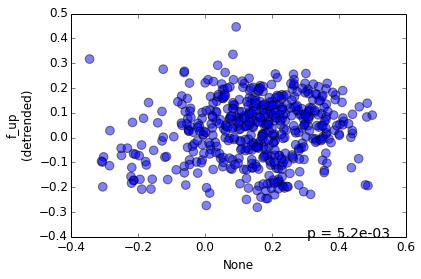

In [18]:
series_scatter(pcna_corr, d2)

In [18]:
def switch_plot(g):
    fig, axs = subplots(1,2, figsize=(9,4))
    ax=axs[0]
    series_scatter(meta_pcna_all[:,'01'], mirna_df.ix[g].ix[ti(codes=='KIRC')][:,'01'],
                   color=colors[1], ax=ax, ann=None)
    series_scatter(meta_pcna_all[:,'11'], mirna_df.ix[g].ix[ti(codes=='KIRC')][:,'11'],
                   color=colors[0], ax=ax, ann=None)

    ax=axs[1]
    series_scatter(meta_pcna_all[:,'01'], df_s2.ix[g][:,'01'],
                   color=colors[1], ax=ax, ann=None, s=20, alpha=.3)
    series_scatter(meta_pcna_all[:,'11'], df_s2.ix[g][:,'11'],
                   color=colors[0], ax=ax, ann=None, s=20)
    
    for ax in axs:
        prettify_ax(ax)
        ax.set_xbound(meta_pcna.min(), meta_pcna.max())
    fig.tight_layout()

In [21]:
pcna_corr.order()

hsa-mir-122      -0.35
hsa-mir-99a      -0.31
hsa-mir-30a      -0.31
hsa-mir-139      -0.31
hsa-mir-101-2    -0.30
hsa-let-7c       -0.29
hsa-mir-101-1    -0.28
hsa-mir-125b-2   -0.25
hsa-mir-100      -0.25
hsa-mir-29c      -0.23
hsa-mir-490      -0.22
hsa-mir-145      -0.22
hsa-mir-143      -0.22
hsa-mir-3926-2   -0.22
hsa-mir-125b-1   -0.21
...
hsa-mir-128-2    0.41
hsa-mir-1269     0.41
hsa-mir-940      0.43
hsa-mir-105-2    0.44
hsa-mir-577      0.44
hsa-mir-767      0.44
hsa-mir-7-3      0.44
hsa-mir-103-2    0.44
hsa-mir-345      0.46
hsa-mir-769      0.46
hsa-mir-9-2      0.48
hsa-mir-301b     0.48
hsa-mir-183      0.48
hsa-mir-9-1      0.49
hsa-mir-130b     0.50
Length: 520, dtype: float64

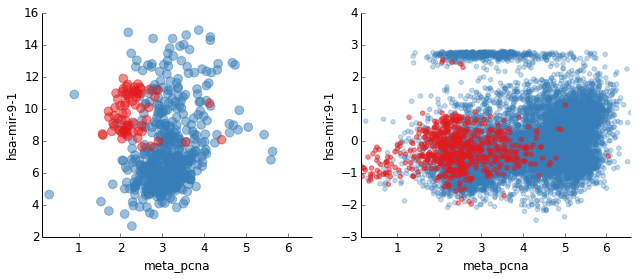

In [24]:
switch_plot('hsa-mir-9-1')

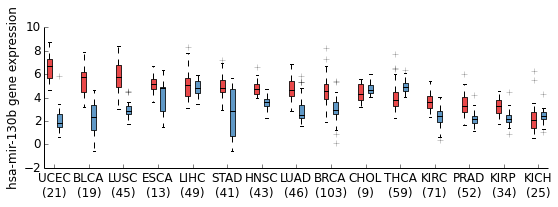

In [23]:
paired_bp_tn_split(matched_mir.ix['hsa-mir-130b'], codes)

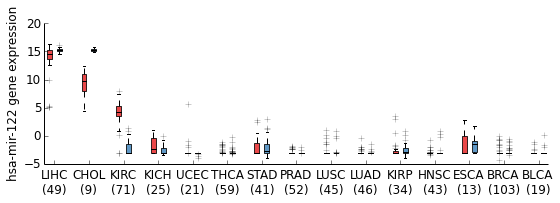

In [20]:
paired_bp_tn_split(matched_mir.ix['hsa-mir-122'], codes)

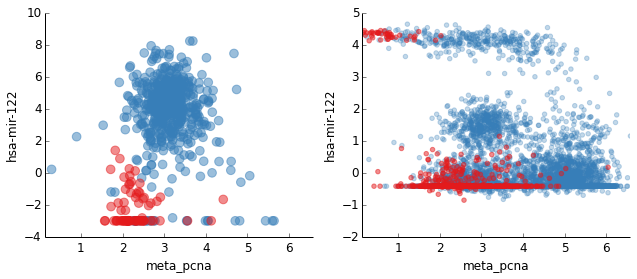

In [19]:
switch_plot('hsa-mir-122')

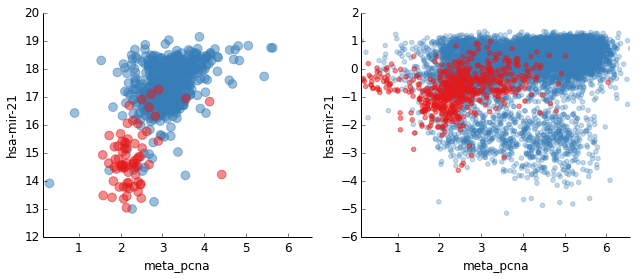

In [21]:
switch_plot('hsa-mir-21')

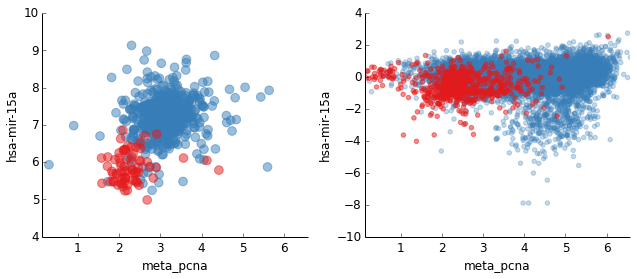

In [25]:
switch_plot('hsa-mir-15a')

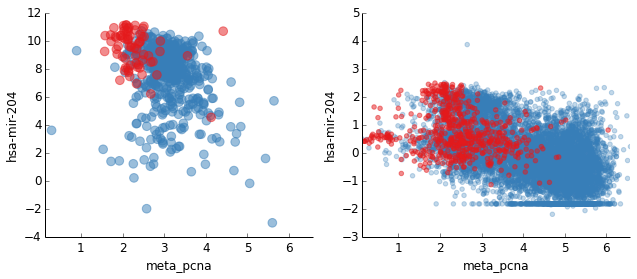

In [78]:
switch_plot('hsa-mir-204')